In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [193]:
#맷플롯립 한글 설정

font_path = r'C:\Users\user\Desktop\경진대회\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [194]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [195]:
df2 = pd.read_excel('C:/Users/user/Desktop/경진대회/소비평가지수.xlsx')
Timeindex = pd.date_range('2019.03', periods=len(df2), freq='M')
df2.set_index(Timeindex, inplace=True)
df2.drop('일자', axis = 1,inplace=True)
df2.head(15)

,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,온라인쇼핑몰 e상품서비스 (단위:백만원),온라인쇼핑몰 식품 (단위:백만원),온라인쇼핑몰 전자 (단위:백만원),온라인쇼핑몰 여가스포츠 (단위:백만원),경제심리지수(원계열),경제심리지수(순환변동치),...,02 주류 및 담배,03 의류 및 신발,04 주택 ·수도 · 전기 및 연료,05 가정용품 및 가사 서비스,07 교통,08 통신,09 오락 및 문화,10 교육,11 음식 및 숙박,12 기타 상품 및 서비스
2019-03-31,100.5,NaN,NaN,0.2,2586885,2000184,1857380,1887506,96.6,95.2,...,102.26,104.10,103.01,107.58,99.30,97.25,101.70,105.19,109.63,108.38
2019-04-30,102.4,NaN,NaN,0.7,2587805,2031463,1603396,1956177,97.6,95.1,...,102.66,103.82,102.76,108.06,100.78,97.52,102.74,105.25,109.80,108.62
2019-05-31,98.7,NaN,NaN,0.7,2802641,2139279,1736273,2102796,94.3,95.1,...,103.12,103.92,102.84,106.95,103.06,97.32,102.32,105.34,110.01,109.00
2019-06-30,98.4,NaN,NaN,0.7,2854338,2084469,1566999,2095443,95.0,95.0,...,103.31,103.97,102.90,106.67,103.31,97.17,101.29,105.39,110.11,108.73
2019-07-31,96.9,NaN,NaN,0.5,3075567,2204550,1673541,2258515,92.2,94.8,...,103.33,103.98,101.47,107.65,102.58,96.76,102.81,105.39,110.35,108.81
2019-08-31,93.5,NaN,NaN,0.5,3268142,2454057,1646430,2250542,91.5,94.5,...,103.38,103.98,101.55,107.28,102.59,97.13,103.65,105.42,110.64,108.77
2019-09-30,97.9,NaN,NaN,0.5,2843301,2463193,1532039,1880731,94.1,93.8,...,103.60,104.02,103.18,106.53,102.99,97.40,102.54,103.58,110.09,108.77
2019-10-31,99.5,NaN,NaN,0.9,3030595,2417261,1645310,2100003,93.5,92.8,...,103.67,104.20,103.34,107.80,103.60,97.33,102.90,103.72,110.27,108.85
2019-11-30,101.7,NaN,NaN,0.9,3235373,2550984,1885360,2121624,94.3,91.1,...,103.40,104.80,103.33,106.96,103.12,96.57,101.20,103.77,110.29,108.92
2019-12-31,101.3,NaN,NaN,0.9,3388613,2617653,1768269,2164971,95.1,88.6,...,103.45,104.80,103.50,107.47,103.58,96.52,100.52,103.83,110.45,108.94


* 코로나 시작 2020.01 -> 이전 데이터 다 0으로 처리

In [196]:
df2.fillna(0, inplace=True) #NaN값은 코로나 컬럼에만 있으므로 다 0으로 채워도 상관없음
df2.head(15)

,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,온라인쇼핑몰 e상품서비스 (단위:백만원),온라인쇼핑몰 식품 (단위:백만원),온라인쇼핑몰 전자 (단위:백만원),온라인쇼핑몰 여가스포츠 (단위:백만원),경제심리지수(원계열),경제심리지수(순환변동치),...,02 주류 및 담배,03 의류 및 신발,04 주택 ·수도 · 전기 및 연료,05 가정용품 및 가사 서비스,07 교통,08 통신,09 오락 및 문화,10 교육,11 음식 및 숙박,12 기타 상품 및 서비스
2019-03-31,100.5,0.0,0.0,0.2,2586885,2000184,1857380,1887506,96.6,95.2,...,102.26,104.10,103.01,107.58,99.30,97.25,101.70,105.19,109.63,108.38
2019-04-30,102.4,0.0,0.0,0.7,2587805,2031463,1603396,1956177,97.6,95.1,...,102.66,103.82,102.76,108.06,100.78,97.52,102.74,105.25,109.80,108.62
2019-05-31,98.7,0.0,0.0,0.7,2802641,2139279,1736273,2102796,94.3,95.1,...,103.12,103.92,102.84,106.95,103.06,97.32,102.32,105.34,110.01,109.00
2019-06-30,98.4,0.0,0.0,0.7,2854338,2084469,1566999,2095443,95.0,95.0,...,103.31,103.97,102.90,106.67,103.31,97.17,101.29,105.39,110.11,108.73
2019-07-31,96.9,0.0,0.0,0.5,3075567,2204550,1673541,2258515,92.2,94.8,...,103.33,103.98,101.47,107.65,102.58,96.76,102.81,105.39,110.35,108.81
2019-08-31,93.5,0.0,0.0,0.5,3268142,2454057,1646430,2250542,91.5,94.5,...,103.38,103.98,101.55,107.28,102.59,97.13,103.65,105.42,110.64,108.77
2019-09-30,97.9,0.0,0.0,0.5,2843301,2463193,1532039,1880731,94.1,93.8,...,103.60,104.02,103.18,106.53,102.99,97.40,102.54,103.58,110.09,108.77
2019-10-31,99.5,0.0,0.0,0.9,3030595,2417261,1645310,2100003,93.5,92.8,...,103.67,104.20,103.34,107.80,103.60,97.33,102.90,103.72,110.27,108.85
2019-11-30,101.7,0.0,0.0,0.9,3235373,2550984,1885360,2121624,94.3,91.1,...,103.40,104.80,103.33,106.96,103.12,96.57,101.20,103.77,110.29,108.92
2019-12-31,101.3,0.0,0.0,0.9,3388613,2617653,1768269,2164971,95.1,88.6,...,103.45,104.80,103.50,107.47,103.58,96.52,100.52,103.83,110.45,108.94


#### 필요컬럼만 가져오기

In [197]:
df2 = df2.iloc[:, [0, 1, 2, 3, 8, 9, 10]];df2.head(15)

,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수
2019-03-31,100.5,0.0,0.0,0.2,96.6,95.2,104.49
2019-04-30,102.4,0.0,0.0,0.7,97.6,95.1,104.87
2019-05-31,98.7,0.0,0.0,0.7,94.3,95.1,105.05
2019-06-30,98.4,0.0,0.0,0.7,95.0,95.0,104.88
2019-07-31,96.9,0.0,0.0,0.5,92.2,94.8,104.56
2019-08-31,93.5,0.0,0.0,0.5,91.5,94.5,104.81
2019-09-30,97.9,0.0,0.0,0.5,94.1,93.8,105.20
2019-10-31,99.5,0.0,0.0,0.9,93.5,92.8,105.46
2019-11-30,101.7,0.0,0.0,0.9,94.3,91.1,104.87
2019-12-31,101.3,0.0,0.0,0.9,95.1,88.6,105.12


In [198]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519292,202103,20,여가/스포츠,2013,여행,여성,30대,1인가구,서울특별시,영등포구,영등포동7가,1411368,7
519293,202103,21,e상품/서비스,2110,o2o서비스,남성,30대,1인가구,서울특별시,영등포구,영등포동7가,1386040,63
519294,202103,11,패션잡화,1113,시계/주얼리,여성,30대,신혼영유아가구,서울특별시,영등포구,영등포동7가,390818,7
519295,202103,16,식품,1610,가공식품,남성,40대,초중고자녀가구,서울특별시,영등포구,영등포동7가,327592,7


In [199]:
#매출금액 단위 만원으로 변환 
data['매출금액'] = data['매출금액']/100000
data.rename(columns={'매출금액' : '매출금액(단위:십만원)'}, inplace=True)

In [200]:
data_f = data[data['품목대분류명'] == '식품']
grouped_C = pd.DataFrame(data_f['매출건수'].groupby(data_f['기준년월']).sum())
grouped_C

,매출건수
기준년월,
201903,475335
201909,379678
202003,613956
202009,749066
202103,686292


In [201]:
grouped_M = pd.DataFrame(data_f['매출금액(단위:십만원)'].groupby(data_f['기준년월']).sum())
grouped_M

,매출금액(단위:십만원)
기준년월,
201903,162485.04474
201909,137629.70433
202003,210014.15140
202009,290701.21990
202103,229093.43697


In [202]:
df_f = pd.merge(grouped_M, grouped_C, on = '기준년월');df_f

,매출금액(단위:십만원),매출건수
기준년월,,
201903,162485.04474,475335
201909,137629.70433,379678
202003,210014.15140,613956
202009,290701.21990,749066
202103,229093.43697,686292


In [203]:
#rng : 먼저 기간 만들어주기
rng = pd.date_range('2019.03', periods=5, freq='6M')
rng

DatetimeIndex(['2019-03-31', '2019-09-30', '2020-03-31', '2020-09-30',
               '2021-03-31'],
              dtype='datetime64[ns]', freq='6M')

In [204]:
#일일히 값 지정해줌.
df_f.set_index(rng, inplace= True)

In [205]:
df_f

,매출금액(단위:십만원),매출건수
2019-03-31,162485.04474,475335
2019-09-30,137629.70433,379678
2020-03-31,210014.15140,613956
2020-09-30,290701.21990,749066
2021-03-31,229093.43697,686292


In [206]:
df_f_upsample = df_f.resample('M').mean()

In [207]:
#(1-1) 앞의 값으로 뒤의 결측값 채우기 (선형회귀로 값 채우기)
# (1) 선형회귀로 값 채우기

df_f_upsample=df_f_upsample.interpolate(method='values')
df_f_upsample=df_f_upsample.reset_index().rename(columns={"index":"기준년월"})

In [208]:
#일수 제거
df_f_upsample["기준년월"] = df_f_upsample["기준년월"].astype(str).str[:-3]

<AxesSubplot:>

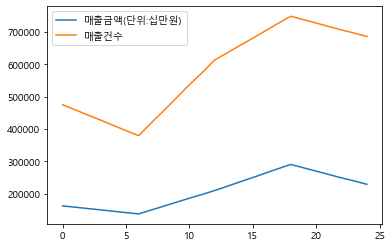

In [209]:
df_f_upsample.interpolate(method='values').plot()

<AxesSubplot:xlabel='기준년월', ylabel='매출건수'>

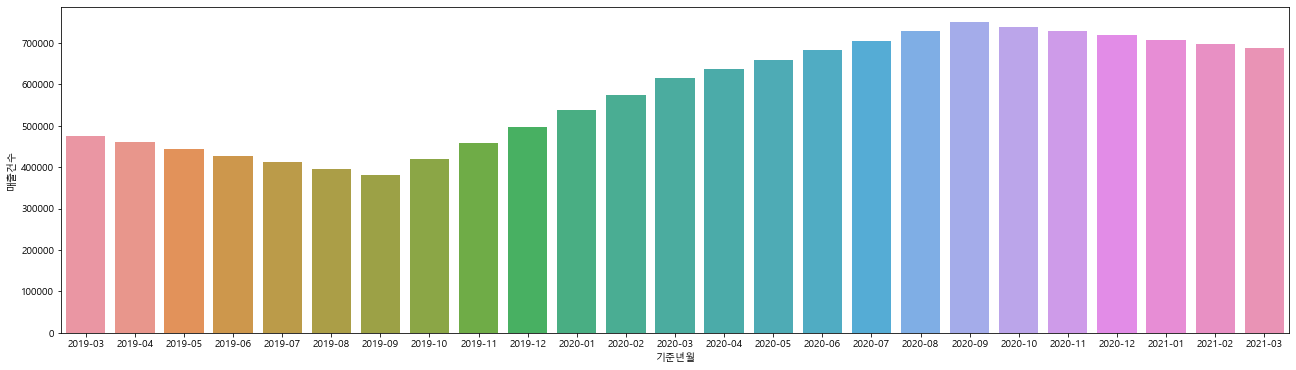

In [210]:
fig, ax = plt.subplots(figsize = (22, 6))
sns.barplot(x = '기준년월', y = '매출건수', data = df_f_upsample)

<AxesSubplot:xlabel='기준년월', ylabel='매출금액(단위:십만원)'>

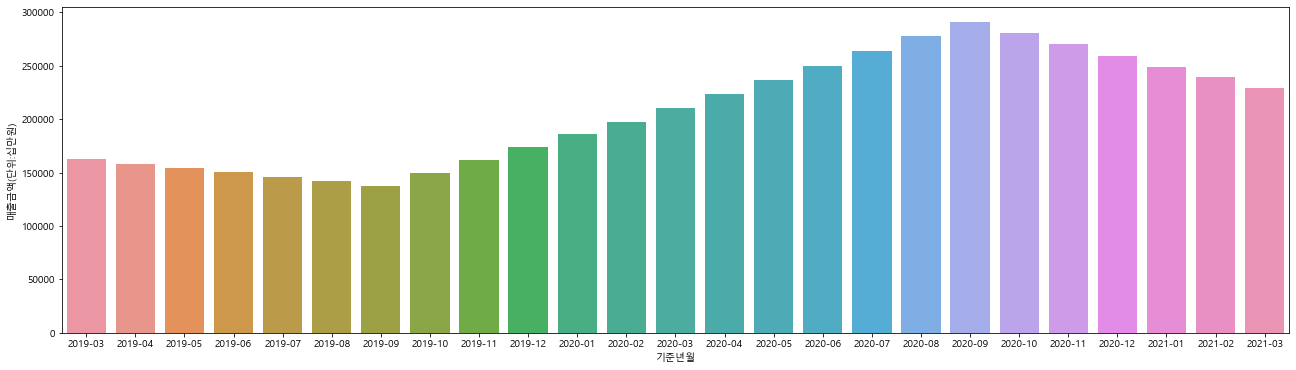

In [211]:
fig, ax = plt.subplots(figsize = (22, 6))
sns.barplot(x = '기준년월', y = '매출금액(단위:십만원)', data = df_f_upsample)

In [212]:
Timeindex2 = pd.date_range('2019.03', periods=len(df_f_upsample), freq = 'M')
Timeindex2

DatetimeIndex(['2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
               '2021-03-31'],
              dtype='datetime64[ns]', freq='M')

In [213]:
df_f_upsample.set_index(Timeindex2, inplace=True)
df_f_upsample.drop('기준년월', axis = 1, inplace=True) 
df_f_upsample

,매출금액(단위:십만원),매출건수
2019-03-31,162485.044740,475335.000000
2019-04-30,158410.398771,459653.524590
2019-05-31,154199.931270,443449.333333
2019-06-30,150125.285301,427767.857923
2019-07-31,145914.817800,411563.666667
2019-08-31,141704.350299,395359.475410
2019-09-30,137629.704330,379678.000000
2019-10-31,149891.550555,419364.437158
2019-11-30,161757.853353,457770.666667
2019-12-31,174019.699578,497457.103825


In [214]:
df2.reset_index(inplace=True)
df_f_upsample.reset_index(inplace=True)

In [241]:
df_merge2 = pd.merge(df2, df_f_upsample, on = 'index',how = 'outer');df_merge

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
기준년월,,,,,,,,,,,,,,,,,,,,,
2018-09-30,982.50,0.000000,2288.479625,1106.79000,2404.584150,0.000000,241.440000,244.909920,1010.424213,1289.288,...,0.000000,1302.467056,0.000000,0.000,4414.62720,2033.719534,0.000000,0.0000,0.000000,13727.479721
2018-10-31,619.50,0.000000,1969.610900,762.14400,1627.101942,0.000000,174.240000,214.801728,871.524928,1205.204,...,0.000000,1080.455626,0.000000,0.000,3520.08432,2031.148460,0.000000,0.0000,0.000000,12066.503527
2018-11-30,691.50,0.000000,2060.716250,849.94000,1739.315869,0.000000,191.760000,238.618656,898.760082,1227.226,...,0.000000,1039.753530,0.000000,0.000,3644.00368,2267.687268,0.000000,0.0000,0.000000,13043.548347
2018-12-31,637.50,0.000000,2342.709000,702.36800,1779.392271,0.000000,235.680000,249.403680,898.760082,1145.144,...,1101.931328,1026.802864,0.000000,1212.685,3307.09792,2216.265788,0.000000,0.0000,0.000000,13971.740926
2019-01-31,735.00,0.000000,4642.034500,808.84400,2148.095174,0.000000,249.600000,253.448064,1074.426825,1115.114,...,1395.478608,1182.210865,0.000000,1047.040,3489.10448,2244.547602,0.000000,0.0000,0.000000,13434.366275
2019-02-28,702.00,0.000000,3275.454250,916.25400,1971.759003,0.000000,243.360000,292.993152,962.762694,1121.120,...,1404.510832,1128.558102,0.000000,1149.290,3527.82928,2622.495480,0.000000,0.0000,0.000000,13580.922998
2019-03-31,630.00,0.000000,3383.913000,851.80800,1915.652040,0.000000,281.280000,303.778176,960.039179,1013.012,...,1869.670368,1097.106483,0.000000,1537.840,3597.53392,3563.508564,0.000000,0.0000,0.000000,13971.740926
2019-04-30,613.50,0.000000,3166.995500,943.34000,1891.606198,0.000000,277.440000,316.810080,962.762694,1021.020,...,2262.572112,1182.210865,0.000000,1419.230,3481.35952,4499.379500,0.000000,2743.5240,0.000000,13629.775239
2019-05-31,529.50,0.000000,3459.834125,822.85400,1811.453393,0.000000,273.600000,309.170688,958.677421,995.995,...,1571.606976,975.000197,0.000000,1290.395,3593.66144,5980.318124,0.000000,2475.3600,0.000000,11871.094563


In [242]:
df_merge2.dropna(inplace=True)
df_merge2

,index,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수,매출금액(단위:십만원),매출건수
0,2019-03-31,100.5,0.0,0.0,0.2,96.6,95.2,104.49,162485.044740,475335.000000
1,2019-04-30,102.4,0.0,0.0,0.7,97.6,95.1,104.87,158410.398771,459653.524590
2,2019-05-31,98.7,0.0,0.0,0.7,94.3,95.1,105.05,154199.931270,443449.333333
3,2019-06-30,98.4,0.0,0.0,0.7,95.0,95.0,104.88,150125.285301,427767.857923
4,2019-07-31,96.9,0.0,0.0,0.5,92.2,94.8,104.56,145914.817800,411563.666667
5,2019-08-31,93.5,0.0,0.0,0.5,91.5,94.5,104.81,141704.350299,395359.475410
6,2019-09-30,97.9,0.0,0.0,0.5,94.1,93.8,105.20,137629.704330,379678.000000
7,2019-10-31,99.5,0.0,0.0,0.9,93.5,92.8,105.46,149891.550555,419364.437158
8,2019-11-30,101.7,0.0,0.0,0.9,94.3,91.1,104.87,161757.853353,457770.666667
9,2019-12-31,101.3,0.0,0.0,0.9,95.1,88.6,105.12,174019.699578,497457.103825


In [217]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [219]:
path = 'C:/Users/user/Desktop/경진대회/KRX 데이터/전종목 시세/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]
file_list_py

df = pd.DataFrame()
Timeindex = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
for i, time in zip(file_list_py,Timeindex):
    data = pd.read_csv(path + i, encoding= 'cp949')
    data_df = pd.DataFrame(data)
    data_df['기준년월'] = time
    df = pd.concat([df, data])
 
df_MC = df.reset_index(drop=True)

In [220]:
def get_category(category, df):
    category_df = df[df['종목명'] == category]
    category_df = category_df[['종목명','종가', '시가총액', '기준년월']]
    category_df.set_index('기준년월', inplace = True)
    return category_df

In [221]:
xlsx = pd.ExcelFile('C:/Users/user/Desktop/경진대회/관련종목.xlsx')
inv_category_F = pd.read_excel(xlsx, sheet_name = '식품')
category_list_F = inv_category_F['종목명'].tolist()

In [222]:
category_df_list = []
for i in range(len(category_list_F)):
     category_df_list.append(get_category(category_list_F[i], df_MC))

In [223]:
df = pd.DataFrame(index = Timeindex)
df.index.names = ['기준년월']

In [224]:
cri_9_1_df = pd.read_csv(r'C:\Users\user\Desktop\경진대회\KRX 데이터\18.09.03.csv', encoding='cp949')

In [225]:
def get_category_2(category, df):
    category_df = df[df['종목명'] == category]
    category_df = category_df[['종목명', '시가총액']]
    return category_df

In [226]:
df_list = []
for i in range(len(category_list_F)):
     if category_list_F[i] in cri_9_1_df['종목명'].tolist():
          df_list.append(get_category_2(category_list_F[i], cri_9_1_df))
     else: 
          pass

In [227]:
df_MC_list = []
for i in range(len(df_list)):
    df_MC_list.append(df_list[i]['시가총액'])

In [228]:
cri_MC_9_1 = np.array(df_MC_list).sum()

In [229]:
def get_category_3(df):
    df = df['시가총액']
    return df

In [230]:
MC_list = []
for i in range(len(category_df_list)):
    MC_list.append(get_category_3(category_df_list[i]))

In [231]:
from functools import reduce
df_merge = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), MC_list)

In [232]:
df_merge.fillna(0, inplace= True)

In [233]:
df_merge  =df_merge/100000000

In [234]:
df_merge.columns = range(150)

In [235]:
alpha = []
list1 = []
for i in np.arange(1,35):
    if 0 in df_merge.iloc[i-1, :].tolist():
        A = df_merge.iloc[i, :].sum()
        zero_list = df_merge.iloc[i-1,:][df_merge.iloc[i-1, : ] == 0].index.tolist()
        for j in range(len(zero_list)):
            alpha.append(df_merge.iloc[i,zero_list[j]])
        alpha_sum = np.array(alpha).sum()
        list1.append(df_merge.iloc[i, :].sum()/(cri_MC_9_1 + alpha_sum/A))
    elif 0 not in df_merge.iloc[i-1, :].tolist():
        list1.append(df_merge.iloc[i, :].sum()/cri_MC_9_1)

In [236]:
list1.insert(0, df_merge.iloc[0, :].sum()/cri_MC_9_1)

In [237]:
len(list1)

35

In [238]:
df = pd.DataFrame(list1, index = Timeindex)
df.reset_index(inplace=True)
df.columns = ['index', '주가지수']
df

,index,주가지수
0,2018-09-30,1.026637e-08
1,2018-10-31,8.740130e-09
2,2018-11-30,9.558351e-09
3,2018-12-31,9.360772e-09
4,2019-01-31,9.967054e-09
5,2019-02-28,9.933799e-09
6,2019-03-31,1.028999e-08
7,2019-04-30,1.037902e-08
8,2019-05-31,9.440447e-09
9,2019-06-30,9.587350e-09


In [246]:
df_merge = pd.merge(df_merge2, df, on = 'index', how = 'inner')
df_merge.set_index('index', inplace=True)
df_merge.head(15)

,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수,매출금액(단위:십만원),매출건수,주가지수
index,,,,,,,,,,
2019-03-31,100.5,0.0,0.0,0.2,96.6,95.2,104.49,162485.044740,475335.000000,1.028999e-08
2019-04-30,102.4,0.0,0.0,0.7,97.6,95.1,104.87,158410.398771,459653.524590,1.037902e-08
2019-05-31,98.7,0.0,0.0,0.7,94.3,95.1,105.05,154199.931270,443449.333333,9.440447e-09
2019-06-30,98.4,0.0,0.0,0.7,95.0,95.0,104.88,150125.285301,427767.857923,9.587350e-09
2019-07-31,96.9,0.0,0.0,0.5,92.2,94.8,104.56,145914.817800,411563.666667,8.871834e-09
2019-08-31,93.5,0.0,0.0,0.5,91.5,94.5,104.81,141704.350299,395359.475410,8.427215e-09
2019-09-30,97.9,0.0,0.0,0.5,94.1,93.8,105.20,137629.704330,379678.000000,9.040034e-09
2019-10-31,99.5,0.0,0.0,0.9,93.5,92.8,105.46,149891.550555,419364.437158,8.910696e-09
2019-11-30,101.7,0.0,0.0,0.9,94.3,91.1,104.87,161757.853353,457770.666667,8.900058e-09


In [250]:
#타켓, 피처나누기
y_target = df_merge['주가지수']
X_features = df_merge.drop('주가지수', axis = 1)

<AxesSubplot:>

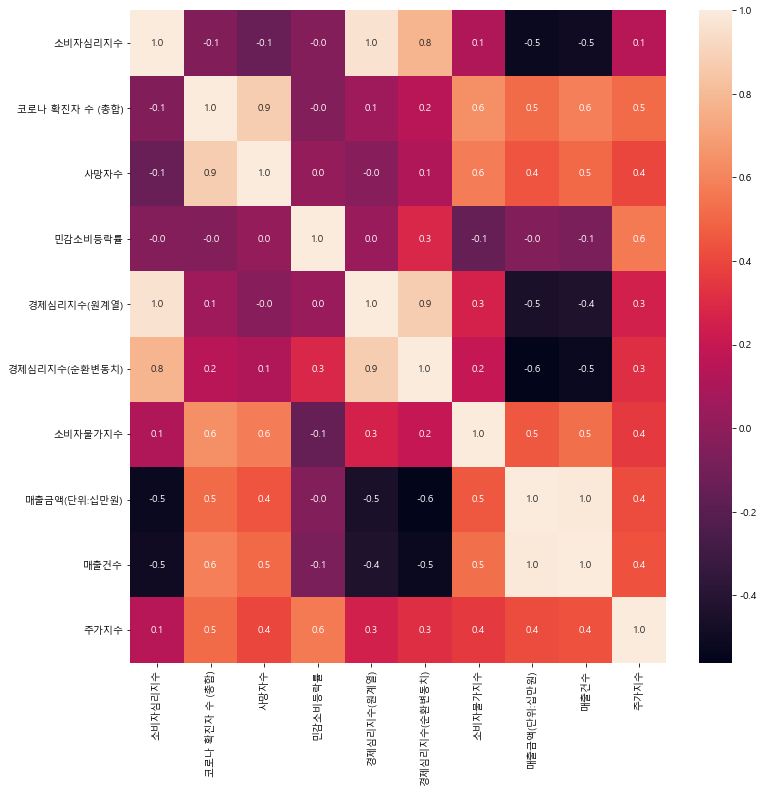

In [252]:
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(df_merge.corr(), annot=True, fmt = '.1f', ax = ax)